In [10]:
import sys, os
import numpy as np
from tqdm import tqdm
import glob

import matplotlib.pyplot as plt
import tikzplotlib

working_path = os.path.join(os.path.dirname(os.getcwd()), '')
parent_path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), '')

sys.path.append(working_path)
sys.path.append(parent_path)

In [20]:
STLSTM_t32_d32_file = "/home/roland/Projekte/Tests/FromSurface2DepthKedro/data/05_validation/regimeB/exp2/STLSTM_t32_d32_Y_test_00.npy"
STLSTM_t32_d32 = np.load(STLSTM_t32_d32_file)

In [31]:
def getDictFromDT(dt=2):
    if dt>1:
        mae_file_path = "/home/roland/Projekte/Tests/FromSurface2DepthKedro/data/05_validation/regimeB/exp4"
        files_prefix = f"STLSTM_t_0_{dt}"
    else:
        mae_file_path = "/home/roland/Projekte/Tests/FromSurface2DepthKedro/data/05_validation/regimeB/exp3"
        files_prefix = f"STLSTM_t32_d"
        
    files = glob.glob(os.path.join(mae_file_path, files_prefix + "*"))

    MAE = dict()
    for file in files:
        basename = os.path.basename(file)
        MAE[basename] = np.load(file)[0]
        
    return MAE

def fromDict2Point(number, MAE):
    for key, values in MAE.items():
        if f"d_{number}_" in key:
            return MAE[key]
    return None

In [35]:
MAE = getDictFromDT(dt=2)
series = np.array([fromDict2Point(num, MAE) for num in range(32)])
series

array([0.011985563, None, None, None, 0.020010052, None, None, None,
       0.036740035, None, None, None, 0.08357636, None, None, None,
       0.13493924, None, None, None, 0.22422306, None, None, None,
       0.28864372, None, None, None, 0.33371928, None, None, None],
      dtype=object)

<IPython.core.display.Javascript object>


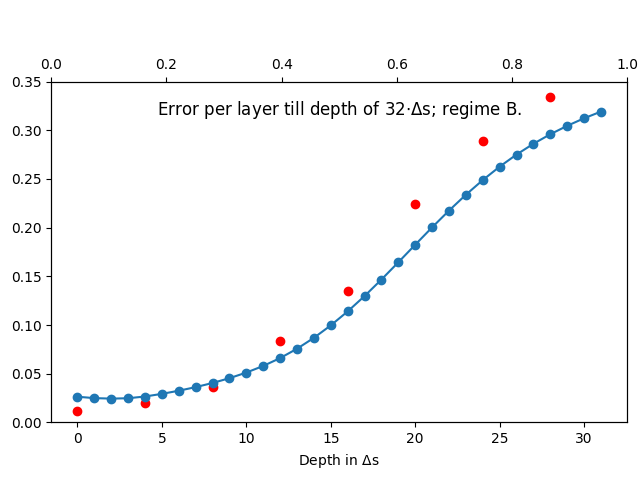

In [36]:
%matplotlib notebook

fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.subplots_adjust(left=0.08, right=0.98, top=0.83, bottom=0.12)

ax2 = ax1.twiny()


ax1.scatter(range(32),series, c="r")
ax1.plot(STLSTM_t32_d32)
ax1.set_ylim([0,0.35])
ax1.set_xlabel("Depth in $\Delta$s")

ax1.scatter(range(32), STLSTM_t32_d32)

plt.rcParams['axes.titley'] = 1.0    # y is in axes-relative coordinates.
plt.rcParams['axes.titlepad'] = -24  # pad is in points...

plt.title("Error per layer till depth of 32$\cdot\Delta$s; regime B.")

tikzplotlib.save("test.tex")